# Problem Statement :-

#### 1. Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### 2. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### 3. Suggest teams or players a company should endorse for its products.

# Solution :-

What is Exploratory Data Analysis?

Exploratory data analysis (EDA) is used to analyze and investigate datasets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

## Importing Libraries 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Dataset 

In [3]:
data_matches=pd.read_csv("matches.csv")
data_deliveries=pd.read_csv("deliveries.csv")

## Dataset Information 

In [4]:
data_matches.shape

(756, 18)

In [5]:
data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
data_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
data_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
data_deliveries.shape

(179078, 21)

In [9]:
data_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
data_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Total Matches Played by Each Teams

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

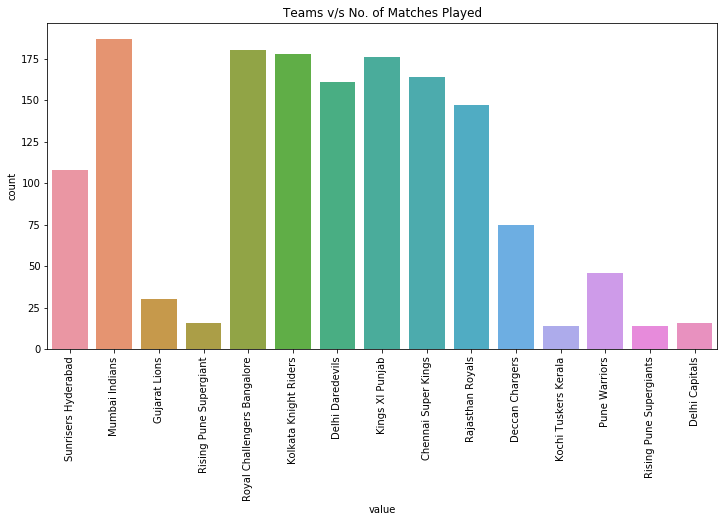

In [12]:
matches1 = data_matches.team1.value_counts()
matches2 = data_matches.team2.value_counts()
matches = matches1 + matches2
print(matches)
matches = pd.melt(data_matches, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
g1 = sns.countplot(x='value', data=matches)
plt.title("Teams v/s No. of Matches Played")
plt.xticks(rotation='vertical')

## Total Matches Won by Each Teams 

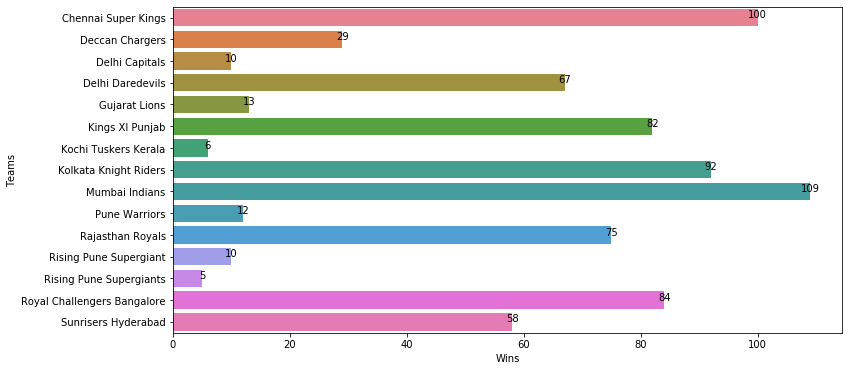

In [13]:
winner_count = dict(data_matches.winner.value_counts())
winner_df = pd.DataFrame(winner_count.items(), columns=['Teams', 'Wins']).sort_values('Teams').reset_index()
plt.figure(figsize=(12,6))
g2 = sns.barplot(y = 'Teams', x = 'Wins',data=winner_df ,orient='h',palette="husl")
for index,row in winner_df.iterrows():
    g2.text(row.Wins,row.name,round(row.Wins,2),color='black',ha='center')
plt.show()

## Win Percentage of Each Team

In [14]:
matches1 = data_matches.team1.value_counts()
matches2 = data_matches.team2.value_counts()
matches3 = dict(matches1+matches2)
matches3_df = pd.DataFrame(matches3.items(),columns=['Team','Matches'])
matches3_df['Wins'] = winner_df['Wins']
matches3_df['Percentage'] = round((matches3_df['Wins']/matches3_df['Matches'])*100,2)
matches3_df

,Team,Matches,Wins,Percentage
0,Chennai Super Kings,164,100,60.98
1,Deccan Chargers,75,29,38.67
2,Delhi Capitals,16,10,62.50
3,Delhi Daredevils,161,67,41.61
4,Gujarat Lions,30,13,43.33
5,Kings XI Punjab,176,82,46.59
6,Kochi Tuskers Kerala,14,6,42.86
7,Kolkata Knight Riders,178,92,51.69
8,Mumbai Indians,187,109,58.29
9,Pune Warriors,46,12,26.09


## Season-Wise Winners 

In [15]:
season_winner = data_matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
season_winner.sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Total Matches Played on Each Stadium

In [16]:
venue_count = dict(data_matches.venue.value_counts())
venue_count_df = pd.DataFrame(venue_count.items(), columns=['Venue', 'Count'])

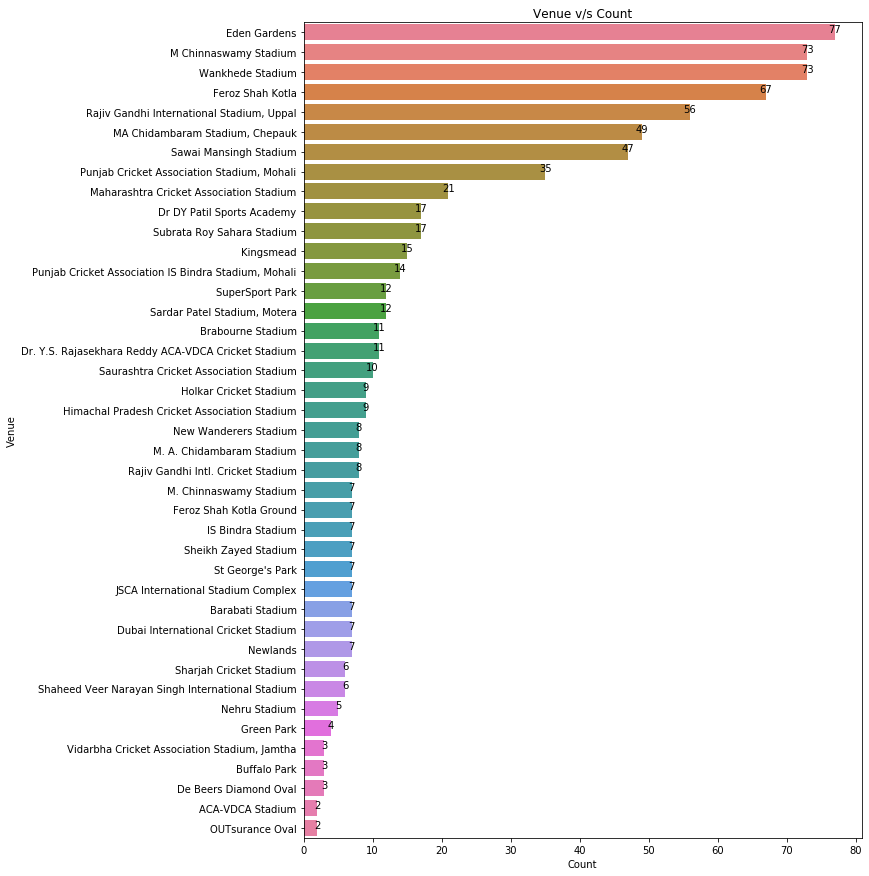

In [17]:
plt.figure(figsize=(10,15))
plt.title("Venue v/s Count")
g3 = sns.barplot(y = 'Venue', x = 'Count',data=venue_count_df,orient='h',palette='husl')
for index,row in venue_count_df.iterrows():
    g3.text(row.Count,row.name,round(row.Count,2),color='black',ha='center')
plt.show()

## No. of Matches Won by the Team on Particular Stadium 

In [18]:
winner_venue = data_matches.groupby(['venue','winner'])['winner'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True)
top10_winner_venue = winner_venue.iloc[:10,:]
top10_winner_venue

,venue,winner,count
0,Eden Gardens,Kolkata Knight Riders,45
1,Wankhede Stadium,Mumbai Indians,42
2,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,34
3,M Chinnaswamy Stadium,Royal Challengers Bangalore,34
4,Sawai Mansingh Stadium,Rajasthan Royals,32
5,Feroz Shah Kotla,Delhi Daredevils,27
6,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,25
7,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
8,Eden Gardens,Mumbai Indians,10
9,M Chinnaswamy Stadium,Mumbai Indians,8


## Result of Matches

normal       743
tie            9
no result      4
Name: result, dtype: int64


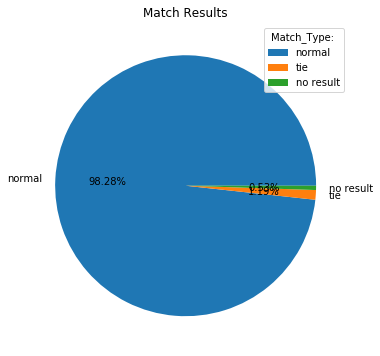

In [19]:
result_type = data_matches.result.value_counts()
print(result_type)
result_type = dict(data_matches.result.value_counts())
y = result_type.values()
mylabels = result_type.keys()
plt.figure(figsize=(10,6))
plt.title("Match Results")
plt.pie(y, labels = mylabels,autopct='%1.2f%%')
plt.legend(title = "Match_Type: ")
plt.show() 

## No. of Matches in which D/L Method Applied

0    737
1     19
Name: dl_applied, dtype: int64


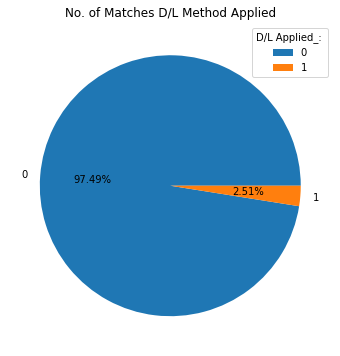

In [20]:
dl_type = data_matches.dl_applied.value_counts()
print(dl_type)
dl_type = dict(data_matches.dl_applied.value_counts())
y1 = dl_type.values()
mylabels1 = dl_type.keys()
plt.figure(figsize=(10,6))
plt.title("No. of Matches D/L Method Applied")
plt.pie(y1, labels = mylabels1,autopct='%1.2f%%')
plt.legend(title = "D/L Applied_: ")
plt.show() 

## Toss Decision  

In [21]:
toss_decision = data_matches.toss_decision.value_counts()
print("Toss Decision:-\n",toss_decision)
print("\n")
toss_decision1 = data_matches.toss_decision.value_counts(normalize=True)
print("Toss Percentage:-\n",toss_decision1)

Toss Decision:-
 field    463
bat      293
Name: toss_decision, dtype: int64


Toss Percentage:-
 field    0.612434
bat      0.387566
Name: toss_decision, dtype: float64


## Effect of Toss on Winning Match 

Text(0, 0.5, 'Count')

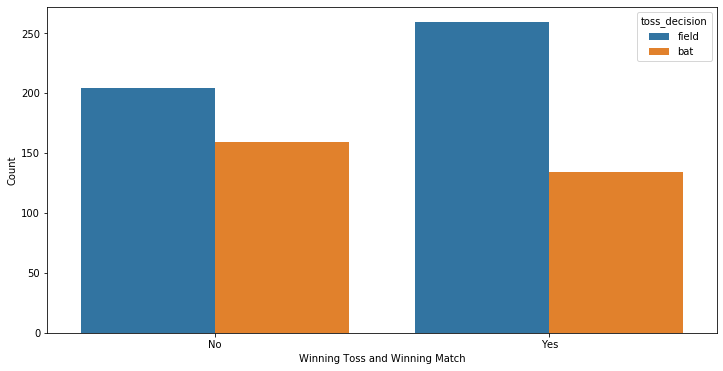

In [22]:
data_matches['toss_win_game_win'] = np.where((data_matches.toss_winner == data_matches.winner),'Yes','No')
plt.figure(figsize = (12,6))
sns.countplot('toss_win_game_win', data=data_matches, hue = 'toss_decision')
plt.xlabel("Winning Toss and Winning Match")
plt.ylabel("Count")

-> Bar "Yes" shows the number of times Team winning the Match after winning the Toss.

## Most Appeared Umpire 

In [23]:
umpire_data = pd.melt(data_matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
print(umpire_data.value.value_counts()[:10])

S Ravi             106
HDPK Dharmasena     87
C Shamshuddin       73
AK Chaudhary        58
SJA Taufel          55
M Erasmus           54
Asad Rauf           51
BR Doctrove         42
Nitin Menon         42
RE Koertzen         41
Name: value, dtype: int64


## Team who won the match with most runs and match details 

In [24]:
print(data_matches.iloc[data_matches['win_by_runs'].idxmax()]['winner'],'won by',data_matches.iloc[data_matches['win_by_runs'].idxmax()]['win_by_runs'],'runs')
print('Match Details:-')
data_matches.iloc[data_matches['win_by_runs'].idxmax()]

Mumbai Indians won by 146 runs
Match Details:-


id                                 44
season                           2017
city                            Delhi
date                       2017-05-06
team1                  Mumbai Indians
team2                Delhi Daredevils
toss_winner          Delhi Daredevils
toss_decision                   field
result                         normal
dl_applied                          0
winner                 Mumbai Indians
win_by_runs                       146
win_by_wickets                      0
player_of_match           LMP Simmons
venue                Feroz Shah Kotla
umpire1                   Nitin Menon
umpire2                     CK Nandan
umpire3                           NaN
toss_win_game_win                  No
Name: 43, dtype: object

## Team who won the match with most wickets and match details 

In [25]:
print(data_matches.iloc[data_matches['win_by_wickets'].idxmax()]['winner'],'won by',data_matches.iloc[data_matches['win_by_wickets'].idxmax()]['win_by_wickets'],'wickets')
print('Match Details:-')
data_matches.iloc[data_matches['win_by_wickets'].idxmax()]

Kolkata Knight Riders won by 10 wickets
Match Details:-


id                                                        3
season                                                 2017
city                                                 Rajkot
date                                             2017-04-07
team1                                         Gujarat Lions
team2                                 Kolkata Knight Riders
toss_winner                           Kolkata Knight Riders
toss_decision                                         field
result                                               normal
dl_applied                                                0
winner                                Kolkata Knight Riders
win_by_runs                                               0
win_by_wickets                                           10
player_of_match                                     CA Lynn
venue                Saurashtra Cricket Association Stadium
umpire1                                         Nitin Menon
umpire2                                 

## Top 10 Player who won maximum Man of the Match Awards 

In [26]:
man_of_the_match_count = dict(data_matches.player_of_match.value_counts()[:10])
man_of_the_match_count_df = pd.DataFrame(man_of_the_match_count.items(), columns=['Player', 'Count'])
man_of_the_match_count_df

,Player,Count
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


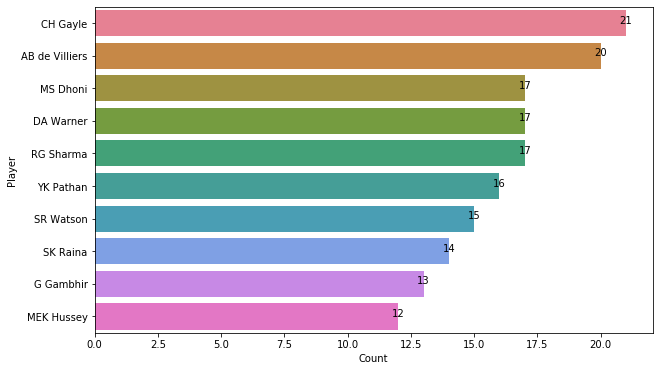

In [27]:
plt.figure(figsize=(10,6))
g4 = sns.barplot(y = 'Player', x = 'Count',data=man_of_the_match_count_df,orient='h',palette='husl')
for index,row in man_of_the_match_count_df.iterrows():
    g4.text(row.Count,row.name,round(row.Count,2),color='black',ha='center')
plt.show()

## Top 10 Run Scorers  

In [28]:
top_scorer = data_deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top10_scorer = top_scorer.iloc[:10,:]
top10_scorer

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


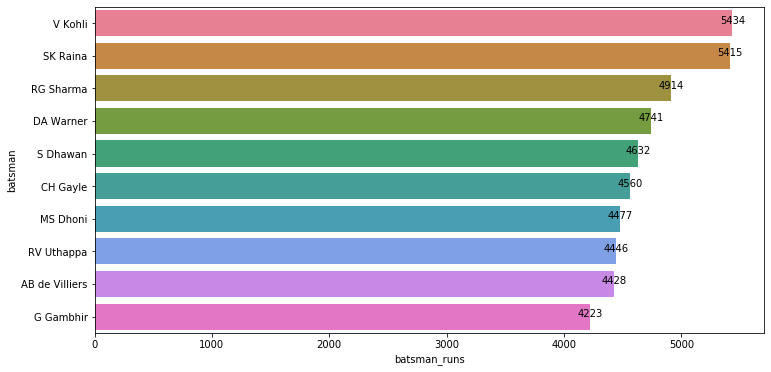

In [29]:
plt.figure(figsize=(12,6))
g5 = sns.barplot(y = 'batsman', x = 'batsman_runs',data=top10_scorer,orient='h',palette='husl')
for index,row in top10_scorer.iterrows():
    g5.text(row.batsman_runs,row.name,round(row.batsman_runs,2),color='black',ha='center')
plt.show()

## Top 10 Player who scored Most 4's   

In [30]:
most_fours = data_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
most10_fours = most_fours.iloc[:10,:]
most10_fours

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


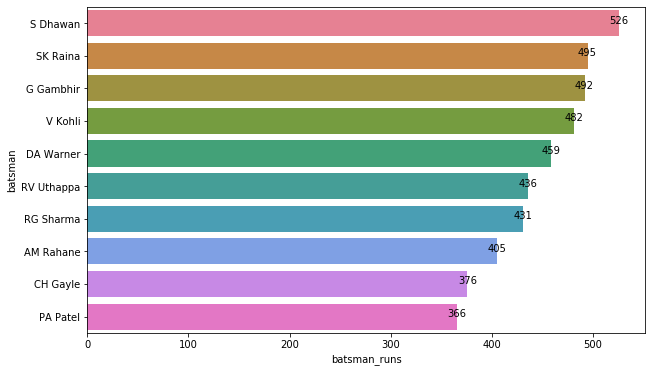

In [31]:
plt.figure(figsize=(10,6))
g6 = sns.barplot(y = 'batsman', x = 'batsman_runs',data=most10_fours,orient='h',palette='husl')
for index,row in most10_fours.iterrows():
    g6.text(row.batsman_runs,row.name,round(row.batsman_runs,2),color='black',ha='center')
plt.show()

## Top 10 Player who scored Most 6's 

In [32]:
most_sixes = data_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
most10_sixes = most_sixes.iloc[:10,:]
most10_sixes

,batsman,batsman_runs
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


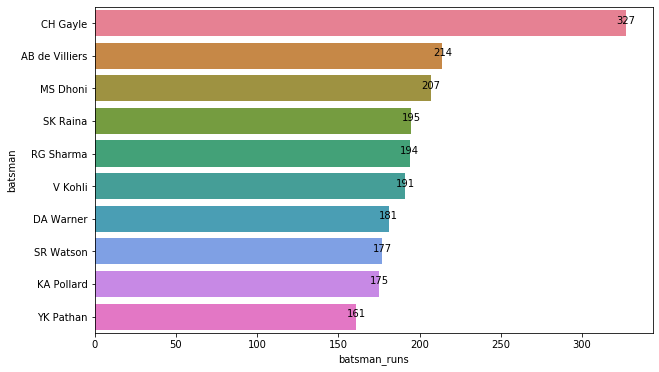

In [33]:
plt.figure(figsize=(10,6))
g7 = sns.barplot(y = 'batsman', x = 'batsman_runs',data=most10_sixes,orient='h',palette='husl')
for index,row in most10_sixes.iterrows():
    g7.text(row.batsman_runs,row.name,round(row.batsman_runs,2),color='black',ha='center')
plt.show()

## Top 10 Players with Most Wickets

In [34]:
top_bowler = data_deliveries.groupby('bowler')['player_dismissed'].agg('count').reset_index().sort_values(by='player_dismissed', ascending=False).reset_index(drop=True)
top10_bowler = top_bowler.iloc[:10,:]
top10_bowler

,bowler,player_dismissed
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


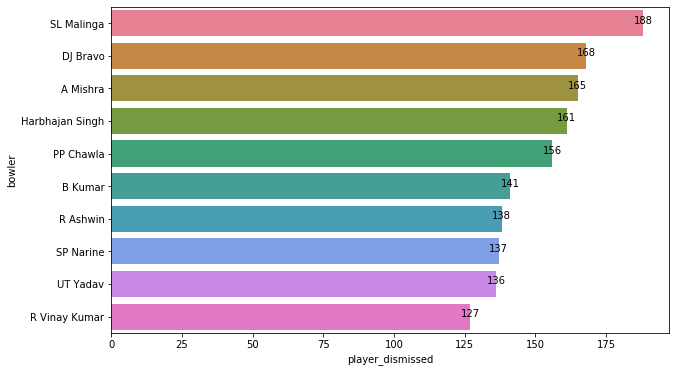

In [35]:
plt.figure(figsize=(10,6))
g8 = sns.barplot(y = 'bowler', x = 'player_dismissed',data=top10_bowler,orient='h',palette='husl')
for index,row in top10_bowler.iterrows():
    g8.text(row.player_dismissed,row.name,round(row.player_dismissed,2),color='black',ha='center')
plt.show()

## Top 10 Bowlers who bowled Most No. of Balls 

In [36]:
most_balls = data_deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
most10_balls = most_balls.iloc[:10,:]
most10_balls

,bowler,ball
0,Harbhajan Singh,3451
1,A Mishra,3172
2,PP Chawla,3157
3,R Ashwin,3016
4,SL Malinga,2974
5,DJ Bravo,2711
6,B Kumar,2707
7,P Kumar,2637
8,UT Yadav,2605
9,SP Narine,2600


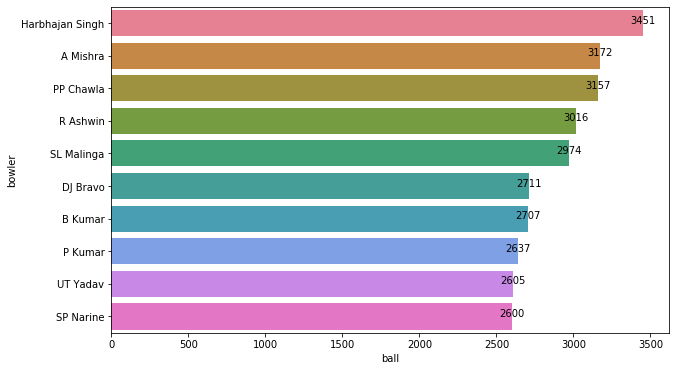

In [37]:
plt.figure(figsize=(10,6))
g9 = sns.barplot(y = 'bowler', x = 'ball',data=most10_balls,orient='h',palette='husl')
for index,row in most10_balls.iterrows():
    g9.text(row.ball,row.name,round(row.ball,2),color='black',ha='center')
plt.show()

## Top 10 Bowlers who bowled Most No. of Dot Balls 

In [38]:
most_dots = data_deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
most10_dots = most_dots.iloc[:10,:]
most10_dots

,bowler,total_runs
0,Harbhajan Singh,1244
1,SL Malinga,1144
2,B Kumar,1116
3,A Mishra,1108
4,PP Chawla,1100
5,P Kumar,1075
6,R Ashwin,1067
7,SP Narine,1038
8,DW Steyn,996
9,UT Yadav,942


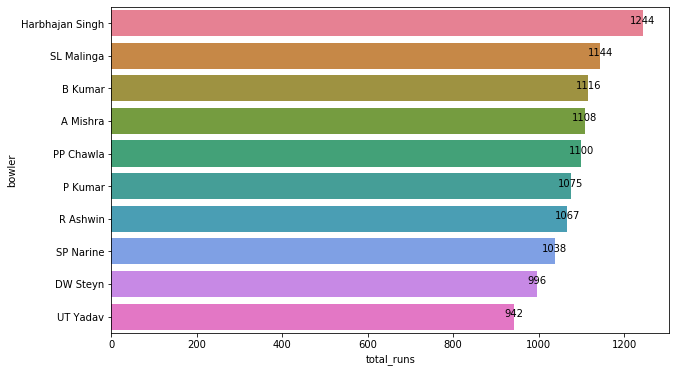

In [39]:
plt.figure(figsize=(10,6))
g10 = sns.barplot(y = 'bowler', x = 'total_runs',data=most10_dots,orient='h',palette='husl')
for index,row in most10_dots.iterrows():
    g10.text(row.total_runs,row.name,round(row.total_runs,2),color='black',ha='center')
plt.show()

## Types of Dismissal 

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64


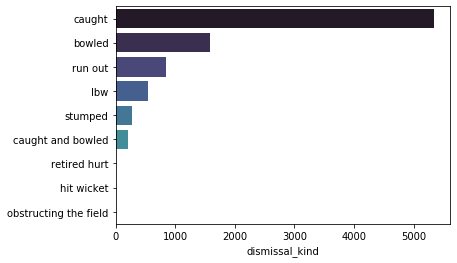

In [40]:
dismissal_type = data_deliveries.dismissal_kind.value_counts()
print(dismissal_type)
sns.barplot(y = dismissal_type.index, x = dismissal_type, orient='h',palette="mako")
plt.show()

## Top 10 Player who took Most Catches 

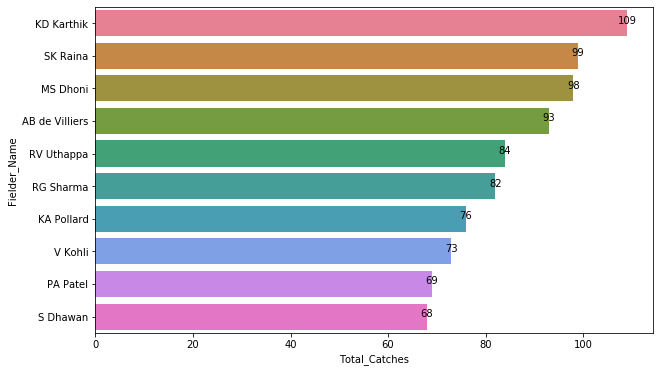

In [41]:
fielder_caught_data = data_deliveries[data_deliveries['dismissal_kind']=='caught']
fielder_caught = dict(fielder_caught_data['fielder'].value_counts()[:10])
fielder_caught_df = pd.DataFrame(fielder_caught.items(),columns=['Fielder_Name','Total_Catches'])
plt.figure(figsize=(10,6))
g11 = sns.barplot(y = 'Fielder_Name', x = 'Total_Catches',data=fielder_caught_df,orient='h',palette='husl')
for index,row in fielder_caught_df.iterrows():
    g11.text(row.Total_Catches,row.name,round(row.Total_Catches,2),color='black',ha='center')
plt.show()

## Top 10 Player who did Most Run Out's

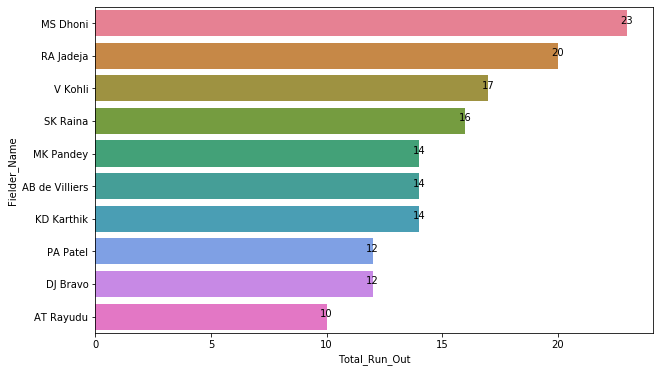

In [42]:
fielder_run_out_data = data_deliveries[data_deliveries['dismissal_kind']=='run out']
fielder_run_out = dict(fielder_run_out_data['fielder'].value_counts()[:10])
fielder_run_out_df = pd.DataFrame(fielder_run_out.items(),columns=['Fielder_Name','Total_Run_Out'])
plt.figure(figsize=(10,6))
g12 = sns.barplot(y = 'Fielder_Name', x = 'Total_Run_Out',data=fielder_run_out_df,orient='h',palette='husl')
for index,row in fielder_run_out_df.iterrows():
    g12.text(row.Total_Run_Out,row.name,round(row.Total_Run_Out,2),color='black',ha='center')
plt.show()

## Conclusion :-
1. Mumbai Indians won most number of matches and won the tournament 4 times.
2. Chennai Super Kings ranked the second highest in winning matches and won the tournament 3 times followed by Kolkata Knight Riders who won the tournament 2 times.
3. Kolkata Knight Riders won 45 matches on Eden Gardens whereas Mumbai Indians won 42 matches on Wankhede Stadium.
4. Delhi Capitals(62.50) and Rising Pune Supergiant(62.50) have highest win percentage.
5. On 19 Matches the D/L Method was applied.
6. On winning toss 61.24% times Team elect to field first.
7. Most of the times Team win the Match after winning te toss. 
8. Eden Gardens hosts the highest number of matches followed by M Chinnaswamy Stadium and Wankhede Stadium.
9. S Ravi did umpiring in 109 matches followed by HDPK Dharmasena who did umpiring in 87 matches.
10. Result of 9 matches were tie and 4 matches had no result rest of all matches had normal result.
11. CH Gayle won the most Man of Match awards in Indian Premier League.
12. V Kohli is the highest run scorer and he scored 5434 runs.
13. S Dhawan smashed 526 4's.
14. CH Gayle smashed 327 6's.
15. SL Malinga took 188 wickets followed by DJ Bravo who took 168 wickets.
16. Harbhajan Singh bowled most number dot of balls(1244).
17. KD Karthik took 109 catches.
18. MS Dhoni did most number of run out's(23).